<a href="https://colab.research.google.com/github/ASO1801040/AI_tech2020/blob/master/2020AI0204_Weather.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import urllib.request as req
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sbn


url = "https://raw.githubusercontent.com/masatokg/JapaneseMeteorologicalAgencySample/master/data_Fukoka.csv"
savefile = "kion20y.csv"

req.urlretrieve(url, savefile)


df = pd.read_csv(savefile, encoding="utf-8")
df.head()

,年,月,日,気温,品質,均質
0,1998,1,1,7.9,8,1
1,1998,1,2,8.7,8,1
2,1998,1,3,9.7,8,1
3,1998,1,4,8.5,8,1
4,1998,1,5,6.3,8,1


###平均気温

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 26376 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 26085 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 26376 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 26085 missing from current font.
  font.set_text(s, 0, flags=flags)


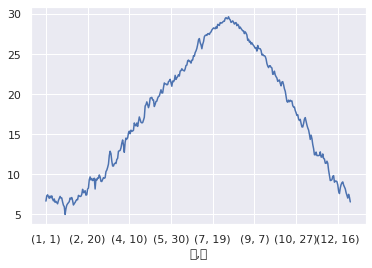

In [ ]:


g = df.groupby(['月','日'])['気温'] # 月・日ごとの気温グループを作る
gg = g.sum()/g.count()

gg.plot()
plt.savefig("tenki-heikin.png")
plt.show()

###30度超フィルター

         年  月   日    気温  品質  均質
184   1998  7   4  30.3   8   1
188   1998  7   8  30.3   8   1
189   1998  7   9  30.2   8   1
213   1998  8   2  30.8   8   1
214   1998  8   3  30.2   8   1
...    ... ..  ..   ...  ..  ..
7537  2018  8  21  32.0   8   1
7538  2018  8  22  32.8   8   1
7539  2018  8  23  31.2   8   1
7540  2018  8  24  30.6   8   1
7542  2018  8  26  30.7   8   1

[272 rows x 6 columns]
年
1998    15
1999     3
2000     9
2001    12
2002     6
2004    17
2005     8
2006    14
2007    11
2008    13
2009     7
2010    27
2011     9
2012    15
2013    37
2014     3
2015     4
2016    20
2017    19
2018    23
Name: 年, dtype: int64


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 24180 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 24180 missing from current font.
  font.set_text(s, 0, flags=flags)


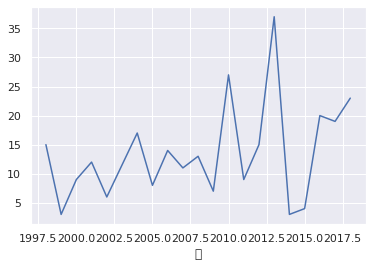

In [ ]:
atui_bool = ( df["気温"]>30 )
atui = df[atui_bool]

print( atui )
cnt = atui.groupby(["年"])["年"].count()

print(cnt)
cnt.plot()
plt.savefig("tenki-over30.png") 
plt.show()

###気温予想

In [ ]:
train_year = (df["年"]<=2017) 
test_year = (df["年"]>=2018) 
interval = 6 

def make_data(data):
  x = [] 
  y = [] 
  
  temps = list(data["気温"])
  for i in range(len(temps)): 
    if i < interval: continue 
    y.append(temps[i])
    xa = [] 
    
    for p in range(interval): 
      d = i + p - interval 
      xa.append(temps[d])
    
    x.append(xa)
  
  return (x, y)

train_x, train_y = make_data( df[train_year] )
test_x, test_y = make_data( df[test_year] )



Lr = LinearRegression(normalize=True)

Lr.fit(train_x, train_y)
pre_y = Lr.predict(test_x) 

###結果を図にプロット

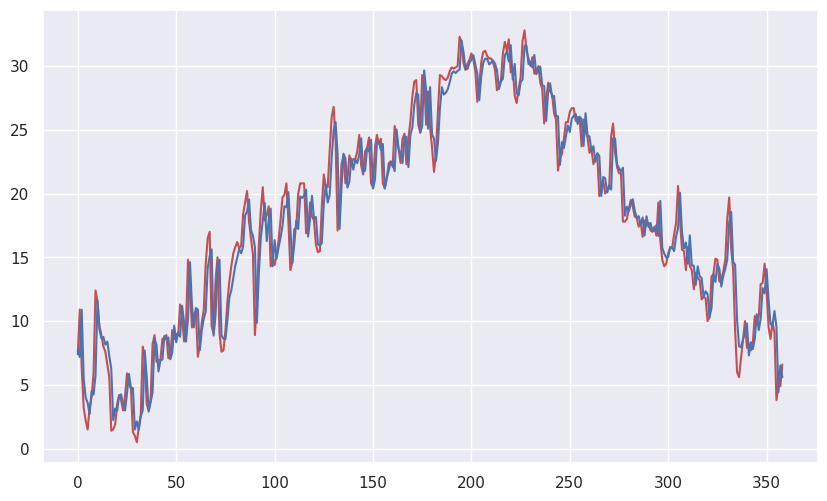

In [ ]:
plt.figure( figsize=(10, 6), dpi=100 )
plt.plot(test_y, c="r") 
plt.plot(pre_y, c="b")

plt.savefig("tenki-kion-Lr.png")  

plt.show()

###実行結果の評価

In [ ]:
diff_y = abs(pre_y - test_y) 
print(  "average=" , sum(diff_y)/len(diff_y) )
print("max=", max(diff_y) )

average= 1.3279674206618133
max= 6.888714505244241


###日本語のインストール

In [ ]:
!ls -ll /root/.cache/matplotlib/ | grep font
!rm /root/.cache/matplotlib/fontList.json
!rm /root/.cache/matplotlib/fontlist-v310.json
!apt-get -y install fonts-ipafont-gothic

rm: cannot remove '/root/.cache/matplotlib/fontList.json': No such file or directory
rm: cannot remove '/root/.cache/matplotlib/fontlist-v310.json': No such file or directory
Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-ipafont-gothic is already the newest version (00303-18ubuntu1).
0 upgraded, 0 newly installed, 0 to remove and 21 not upgraded.


###図にプロット（日本語）

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 26085 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 26085 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 27671 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 28201 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 27671 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 28201 missing from current font.
  font.set_text

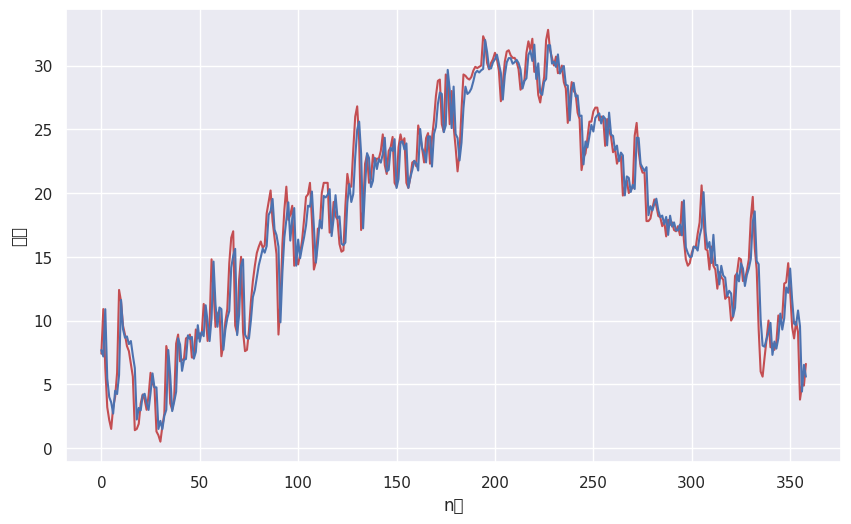

In [ ]:
sbn.set(font="IPAGothic")


plt.figure( figsize=(10, 6), dpi=100 )
plt.xlabel("n日") 
plt.ylabel("気温")
plt.plot(test_y, c="r") 
plt.plot(pre_y, c="b")

plt.savefig("tenki-kion-Lr-JP.png")  

plt.show()